<h4> Importing Modules </h4>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy.random as nr
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.metrics as sklm
import math
import seaborn as sns

<h4> Import Datasets </h4>

In [128]:
spending_data = pd.read_csv('Spending.csv')
customers_data = pd.read_csv('Customers.csv')


<b> Working on the Customer Dataset

In [129]:
customers_data.head()
print(customers_data.shape)
#Drop Duplicates
customers_data.drop_duplicates(subset='CustomerID', keep='first', inplace=True)
print(customers_data.shape)

#Drop Columns with missing values
features_drop=['MiddleName', 'Suffix', 'AddressLine2', 'Title', 'PhoneNumber']
customers_data=customers_data.drop(features_drop, axis=1)
customers_data.info()

(16519, 23)
(16404, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16507
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            16404 non-null  int64 
 1   FirstName             16404 non-null  object
 2   LastName              16404 non-null  object
 3   AddressLine1          16404 non-null  object
 4   City                  16404 non-null  object
 5   StateProvinceName     16404 non-null  object
 6   CountryRegionName     16404 non-null  object
 7   PostalCode            16404 non-null  object
 8   BirthDate             16404 non-null  object
 9   Education             16404 non-null  object
 10  Occupation            16404 non-null  object
 11  Gender                16404 non-null  object
 12  MaritalStatus         16404 non-null  object
 13  HomeOwnerFlag         16404 non-null  int64 
 14  NumberCarsOwned       16404 non-null  int64 
 15  NumberChildr

<b> Dropping Duplicates

In [130]:
spending_data.drop_duplicates(subset='CustomerID', keep='first', inplace=True)
spending_data.shape

(16404, 2)

<b> Merging Customers dataset with Spending dataset

In [131]:
full_data=pd.merge(left=customers_data, right=spending_data, on="CustomerID", how="outer")
full_data.shape

(16404, 19)

<b> Label encoding of a categorical variable

In [132]:
print(full_data['Occupation'].unique())
Features = full_data['Occupation']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
[3 3 3 ... 0 0 0]


<b> OneHotEncoding of a dummy variables

In [133]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

C:\Users\geogr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

<b>Label Encoding and OHE of the rest of the categorical variables

In [134]:
def encode_string(cat_feature):
    
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

cat_columns = ['Education', 'Gender', 'MaritalStatus']
for col in cat_columns:
    temp = encode_string(customers_data[col])
    Features = np.concatenate([Features, temp], axis = 1)
print(Features.shape)
Features[:2,:]

(16404, 14)


C:\Users\geogr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\geogr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

array([[0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.]])

In [135]:
full_data.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend'],
      dtype='object')

<b> Concatenating the features with numerical values

In [136]:
Features = np.concatenate([Features, np.array(full_data[['HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome']])], axis = 1)
print(Features[:2,:])
print(Features.shape)

[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 2.00000e+00
  1.37947e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 3.00000e+00 3.00000e+00
  1.01141e+05]]
(16404, 19)


<b> Splitting the dataset

In [137]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(full_data['AveMonthSpend'])
indx = range(Features.shape[0])
print(indx)
indx = ms.train_test_split(indx, test_size = 0.4)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

range(0, 16404)


<b> Scaling the numerical features

In [138]:
scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] = scaler.transform(x_train[:,14:])
x_test[:,14:] = scaler.transform(x_test[:,14:])
print(x_train.shape)
x_train[:5,:]

(9842, 19)


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.69410561,
         0.44859986, -0.65124974, -1.19500052, -1.16444299],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.69410561,
         0.44859986, -0.65124974, -1.19500052, -0.72394657],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.69410561,
        -0.42741598,  0.67895675, -0.00459616, -0.89407488],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.   

<b> Linear Regression Model

In [139]:
linear_mod = linear_model.LinearRegression(fit_intercept=False)
linear_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [140]:
print(linear_mod.intercept_)
print(linear_mod.coef_)

0.0
[ 1.52921394e+13  1.52921394e+13  1.52921394e+13  1.52921394e+13
  1.52921394e+13 -4.31191795e+12 -4.31191795e+12 -4.31191795e+12
 -4.31191795e+12 -4.31191795e+12 -2.74426682e+12 -2.74426682e+12
 -8.23595467e+12 -8.23595467e+12 -4.11248228e-02 -3.73354120e-01
  1.70163314e+01 -5.13113897e-01  8.70953388e+00]


<b> Predictions

In [141]:
y_score = linear_mod.predict(x_test)
y_score

array([63.97440163, 73.34661308, 68.44181515, ..., 60.42619791,
       87.28581985, 71.17367603])

In [142]:
score =linear_mod.score(x_test, y_test)
print(score)

0.9456872295385669


<b> Evaluation

In [143]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = linear_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)   

Mean Square Error      = 40.97538172093289
Root Mean Square Error = 6.401201584150657
Mean Absolute Error    = 4.826316895030845
Median Absolute Error  = 3.730737409434468
R^2                    = 0.9456872295385669
Adjusted R^2           = 0.9454627966027759


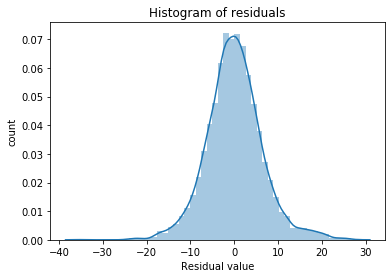

In [144]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

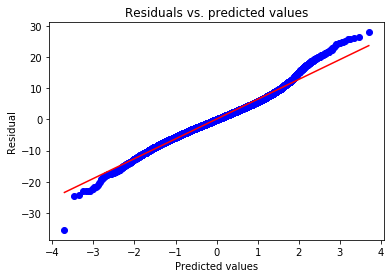

In [145]:
import scipy.stats as ss
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score) 

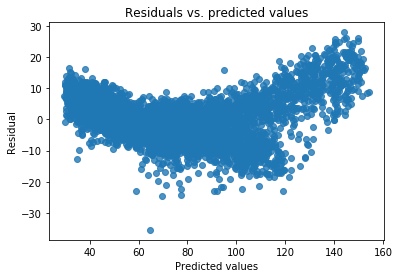

In [146]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score)

<b> Importing a testing dataset

In [147]:
test = pd.read_csv('AW_test.csv')

In [148]:
## Label Encoding
print(test['Occupation'].unique())
Testing=test['Occupation']
enc = preprocessing.LabelEncoder()
enc.fit(Testing)
Testing = enc.transform(Testing)
# print(Features)

['Management' 'Skilled Manual' 'Manual' 'Clerical' 'Professional']


In [149]:
## OneHotEncoding
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Testing.reshape(-1,1))
Testing = encoded.transform(Testing.reshape(-1,1)).toarray()
# Features

C:\Users\geogr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [150]:
## Label encoding and OHE function
def categorical_encoding (cat_feature):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    cat_feature_encoded = enc.transform(cat_feature)
    
    #OneHotEncoding the dummy variables
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(cat_feature_encoded.reshape(-1,1))
    return encoded.transform(cat_feature_encoded.reshape(-1,1)).toarray()

categorical_cols =['Education', 'Gender', 'MaritalStatus']
for col in categorical_cols:
    temp = categorical_encoding(test[col])
    Testing = np.concatenate([Testing, temp], axis=1)
print(Testing.shape)

(500, 14)


C:\Users\geogr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\geogr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [151]:
## Combining Testing with numerical features
Testing = np.concatenate([Testing, np.array(test[['HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']])], axis=1)
print(Testing.shape)

(500, 19)


In [152]:
## Scaling numerical Features
Testing[:, 14:] = scaler.transform(Testing[:,14:])
Testing.shape

(500, 19)

In [153]:
## Prediction using the Linear regression Model
prediction = linear_mod.predict(Testing)
prediction.shape

(500,)

In [154]:
## Creating a Submission DataFrame
submission2 = pd.DataFrame({
        "CustomerID": test["CustomerID"],
        "AveMonthSpend": prediction
    })

submission2.to_csv('submission2.csv', index=False)

In [155]:
submission2 = pd.read_csv('submission2.csv')
submission2.head()

,CustomerID,AveMonthSpend
0,18988,42.185741
1,29135,105.836780
2,12156,50.016846
3,13749,87.783364
4,27780,60.727675
